## DECISION TREES !!!

<div class='alert alert-info'>
Objective
<div>


Use decision tree model to determine the factors that predict whether a mushroom is poisonous or edible

<div class='alert alert-info'>
            Content
            </div>
            
#### 1. Data Preprocessing
    - Inspecting Data frame
    - Rename columns
    - Replace value of columns
    - Pandas Profiling Report Overview
    - Handling Nan values

#### 2. Dataset Descriptions 
    - Max values per column
    - Min values per column
    
#### 3. Splitting the dataset into train and test sets
    - Create dummy variables
    - Length of testing dataset 
    
#### 4. Instantiate Decision Tree Classifier and Fit model
    - Prediction

#### 5. Making predictions and evaluating performance¶
    - Confusion matrix 
    - Classification report
    - Receiver Operating Characteristic (ROC)

#### 6. References

<div class='alert alert-info'>
    Well, Let the fun begin !!
    </div>

### 1. Data Preprocessing
    - Inspecting Data frame
    - Rename columns
    - Replace value of columns
    - Pandas Profiling Report Overview
    - Handling Nan values

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/agaricus-lepiota.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#rename columns
df = df.rename(columns = {0:'classes', 1:'cap-shape',2:'cap-surface', 3: 'cap-color',4: 'bruises',
                    5:'odor', 6:'gill-attachment', 7: 'gill-spacing', 8:'gill-size',
                    9:'gill-color', 17:'veil-color', 18:'ring-number', 19:'ring-type',10:'stalk-shape',
                    11:'stalk-root', 12:'stalk-surface-above-ring', 13:'stalk-surface-below-ring',
                     14:'stalk-color-above-ring',15:'stalk-color-below-ring', 16:'veil-type',
                     20:'spore-print-color',21:'population',22:'habitat'})
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#replace value of columns
df['classes'] = df['classes'].replace({'p':'poisonous', 'e':'edible'})
df['cap-shape'] = df['cap-shape'].replace(to_replace=['b','c','x','f','k','s'], value = ['bell','conical','convex','flat','knobbed','sunken'])
df['cap-surface'] = df['cap-surface'].replace(to_replace=['f','g','y','s'], value = ['fibrous','grooves','scaly','smooth'])
df['cap-color'] = df['cap-color'].replace(to_replace =['n','b','c','g','r','p','u','e','w','y'], value=['brown','buff','cinnamon','gray','green','pink','purple','red','white','yellow'])
df['bruises'] = df['bruises'].replace(to_replace= ['t','f'], value = ['bruises','no'])
df['odor'] = df['odor'].replace(to_replace = ['a','l','c','y','f','m','n','p','s'], value = ['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])
df['gill-attachment'] = df['gill-attachment'].replace(to_replace = ['a','d','f','n'], value =['attached','descending','free','notched'])
df['gill-spacing'] = df['gill-spacing'].replace(to_replace = ['c','w','d'], value = ['close','crowded','distant'])
df['gill-size'] = df['gill-size'].replace(to_replace = ['b','n'], value = ['broad','narrow'])
df['gill-color'] = df['gill-color'].replace(to_replace = ['k','n','b','h','g','r','o','p','u','e','w','y'], value = ['black','brown','buff','chocolate','gray','green','orange','pink','purple','red','white','yellow'])
df['stalk-shape'] = df['stalk-shape'].replace(to_replace =['e','t'], value = ['enlarging','tapering'])
df['stalk-root'] = df['stalk-root'].replace(to_replace =['b','c','u','e','z','r','?'], value = ['bulbous',' club','cup','equal','rhizomorphs','rooted',np.nan])
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(to_replace =['f','y','k','s'], value = ['fibrous','scaly','silky','smooth'])
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(to_replace =['f','y','k','s'], value = ['fibrous','scaly','silky','smooth'])
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(to_replace =['n','b','c','g','o','p','e','w','y'], value = ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(to_replace =['n','b','c','g','o','p','e','w','y'], value = ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['veil-type'] = df['veil-type'].replace(to_replace =['p','u'], value =['partial','universal'])
df['veil-color'] = df['veil-color'].replace(to_replace =['n','o','w','y'], value =['brown','orange','white','yellow'])
df['ring-number'] = df['ring-number'].replace(to_replace =['n','o','t'], value =['none','one','two'])
df['ring-type'] = df['ring-type'].replace(to_replace =['c','e','f','l','n','p','s','z'], value = ['cobwebby','evanescent','flaring','large','none','pendant','sheathing','zone'])
df['spore-print-color'] = df['spore-print-color'].replace(to_replace =['k','n','b','h','r','o','u','w','y'], value = ['black','brown','buff','chocolate','green','orange','purple','white','yellow'])
df['population'] = df['population'].replace(to_replace =['a','c','n','s','v','y'], value = ['abundant','clustered','numerous','scattered','several','solitary'])
df['habitat'] = df['habitat'].replace(to_replace =['g','l','m','p','u','w','d'], value = ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])

In [24]:
df.head()

     classes cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

### Profile Report Overview

#### Dataset statistics

- Number of variables----- 23
- Number of observations---- 8124
- Duplicate rows---- 0
- Total size in memory---- 11.2 MiB
- Average record size in memory---- 1.4 KiB
- dtypes---- object(23)

#### Warning 

- stalk-root has 2480 (30.5%) missing values
- odor is highly correlated with classes		
- stalk-color-above-ring, veil-color, gill-attachment, stalk-color-below-ring are highly correlated with each other

### Handling Nan values

In [7]:
# Iterate over each column of df
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

In [8]:
print('There a total of {} null values in the dataframe'.format(df.isnull().sum().sum()))

There a total of 0 null values in the dataframe


### 2. Dataset Descriptions 
    - Max values per column
    - Min values per column

In [9]:
df.max()

classes                     poisonous
cap-shape                      sunken
cap-surface                    smooth
cap-color                      yellow
bruises                            no
odor                            spicy
gill-attachment                  free
gill-spacing                  crowded
gill-size                      narrow
gill-color                     yellow
stalk-shape                  tapering
stalk-root                     rooted
stalk-surface-above-ring       smooth
stalk-surface-below-ring       smooth
stalk-color-above-ring         yellow
stalk-color-below-ring         yellow
veil-type                     partial
veil-color                     yellow
ring-number                       two
ring-type                     pendant
spore-print-color              yellow
population                   solitary
habitat                         woods
dtype: object

In [10]:
print('{0} mushrooms seem to often be {1}, {2} in color, and found in {3}.'.format(df['classes'].max(),df['cap-shape'].max(),df['cap-color'].max(),df['habitat'].max()))

poisonous mushrooms seem to often be sunken, yellow in color, and found in woods.


In [11]:
df.min()

classes                         edible
cap-shape                         bell
cap-surface                    fibrous
cap-color                        brown
bruises                        bruises
odor                            almond
gill-attachment               attached
gill-spacing                     close
gill-size                        broad
gill-color                       black
stalk-shape                  enlarging
stalk-root                        club
stalk-surface-above-ring       fibrous
stalk-surface-below-ring       fibrous
stalk-color-above-ring           brown
stalk-color-below-ring           brown
veil-type                      partial
veil-color                       brown
ring-number                       none
ring-type                   evanescent
spore-print-color                black
population                    abundant
habitat                        grasses
dtype: object

In [12]:
print('{0} mushrooms seem to often be {1} shaped, {2} in color, and found in {3}.'.format(df['classes'].min(),df['cap-shape'].min(),df['cap-color'].min(),df['habitat'].min()))

edible mushrooms seem to often be bell shaped, brown in color, and found in grasses.


### 3. Splitting the dataset into train and test sets
    - Create dummy variables
    - Length of testing dataset 

In [13]:
# Segregate features and labels into separate variables
y = df['classes'].replace(to_replace = ['poisonous','edible'], value =[0,1])
X = df.drop('classes', axis = 1)

#Got dummy variables
X = pd.get_dummies(y)

In [14]:
from sklearn.model_selection import train_test_split
#----------------------------------------------------

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify=y)

In [15]:
#Length of testing dataset

len_test      = len(X_test)
len_df        = len(df)
print('The test set has {0} rows, which makes up {1} of the dataframe'.format(len_test, len_test/len_df))

The test set has 2031 rows, which makes up 0.25 of the dataframe


### 4. Instantiate Decision Tree Classifier and Fit model
    - Prediction

In [16]:
from sklearn.tree import DecisionTreeClassifier
#-----------------------------------------------

# Instantiate a DecisionTree classifier with default parameter values
decision_tree = DecisionTreeClassifier()

# Fit decision_tree to the train set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
#Prediction
y_pred = decision_tree.predict(X_test)

### 5. Making predictions and evaluating performance¶
    - Confusion matrix 
    - Classification report
    - Receiver Operating Characteristic (ROC)

In [18]:
# Import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
#--------------------------------------------------------------------

# Print the confusion matrix of the decision_tree model
print('Confusion Matrix \n {}'.format(confusion_matrix(y_test, y_pred)))

# Print the Classification Report of the decision_tree model
print('\nClassification Report \n {}'.format(classification_report(y_test, y_pred)))

Confusion Matrix 
 [[ 979    0]
 [   0 1052]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



- The model is 100% accurate. 
- This is not satisfying as a perfect accuracy score indicates issues, among which may be overfitting, or i could have made a lot of preprocessing, or even included features that should not be a part of the model, such as those that are multicolinear, or even autocorrelated

#### Receiver Operating Characteristic (ROC)

In [19]:
# Import ROC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#----------------------------------------------

logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred)

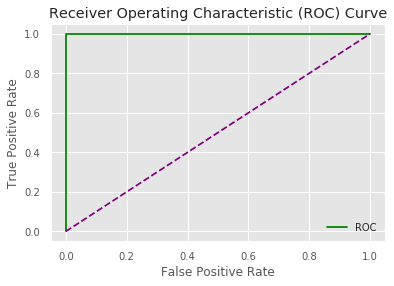

In [20]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## References

- https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
- https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93